<a href="https://colab.research.google.com/github/jmalonso55/MVP_Jorge_Alonso_Machine_Learning/blob/main/Machine_learning_inventario_ES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1 - Definição do problema**:

Este script aborda o uso de métodos clássicos de Machine Learning para um problema de regressão e consiste em parte das análises realizadas para o MVP da Sprint II: Machine Learning & Analytics do curso de Especialização em Ciência de Dados e Analytics.

As análises apresentadas dão sequência ao que foi feito na Sprint I do curso, em que foi feito o pré-processamento e as análises exploratórias e descritivas dos dados. O conteúdo da Sprint I pode ser acessado pelo link: https://github.com/jmalonso55/MVP_Jorge_Alonso_Analise_de_dados.

A base de dados utilizada foi a do Inventário Florestal Nacional (IFN) para o estado do Espírito Santo (ES), disponibilizada publicamente no site do Serviço Florestal Brasileiro (SFB / MAPA). Como não há dados disponíveis para o estado do Rio de Janeiro, os dados do ES foram escolhidos como referência por ser vizinho ao RJ e apresentar fitofisionomias semelhantes (link de acesso: https://snif.florestal.gov.br/pt-br/inventario-florestal-nacional-ifn/ifn-dados-abertos/ifn-resultados-espirito-santo).

O IFN é um levantamento feito pelo governo federal com a finalidade de produzir informações sobre os recursos florestais brasileiros, tendo cunho estratégico. Por outro lado, inventários florestais podem ser realizados com cunho tático para atender a demandas de empresas tais como conhecer a dinâmica de uma floresta e elaborar planos para seu manejo e exploração. Uma das demandas de empresas por inventários é para a obtenção de uma Autorização de Supressão Vegetal (ASV), visto que um dos documentos exigidos para a ASV é o inventário florestal e florístico da vegetação a ser suprimida. Esse é um procedimento muito comum na construção civil de empreendimentos imobiliários, industriais e outros.

Diversas variáveis qualitativas e quantitativas podem ser mensuradas em um inventário florestal. Em geral, quanto mais variáveis forem mensuradas maior é o tempo gasto e maiores serão os custos para sua realização. Portanto, é do interesse das empresas a mensuração do menor número possível de variáveis que possam fornecer as informações necessárias para atender à sua demanda.

O diâmetro à altura do peito (DAP) e a altura total são as principais variáveis quantitativas mensuradas em inventários florestais. Enquanto o DAP pode ser mensurado por meio de fita métrica, suta diâmetrica ou outros instrumentos de fácil operação, mensurar a altura é um procedimento mais complicado. Por exemplo, quando se utiliza vara graduada é muito difícil carregar a ferramenta em uma floresta fechada. Mesmo no caso de uma vara retrátil a operação é difícil e demorada devido a necessidade de abrir e fechar o equipamento na mata, além da dificuldade de visualizar o topo das árvores. Por isso, o procedimento mais comum é estimar a altura com hipsômetros que são aparelhos que utilizam princípios geométricos ou trigonométricos para obter a medida. Ainda assim, persistem as dificuldades como a de se visualizar o topo das árvores e a de encontrar uma distância horizontal conveniente para medição em uma floresta fechada.

Visando atender à necessidade de empresas que realizam inventários florestais e florísticos para obtenção de ASV nos estados do Sudeste, o objetivo deste trabalho é testar métodos clássicos de Machine Learning para elaborar um modelo que permita estimar a altura de árvores a partir de outras variáveis mais fáceis de mensurar.

Este seria um problema de aprendizado supervisionado da categoria regressão. Algumas hipóteses seriam:
1) Existe relação da altura total com o diâmetro e outras variáveis fáceis de mensurar;
2) É possível eliminar do dataset algumas variáveis redundantes ou menos representativas;
3) É viável utilizar modelos de Machine Learning para estimar a altura total a partir de outras variáveis mais fáceis de medir.

Quanto às restrições, o foco do projeto serão as áreas definidas pelo IFN como "floresta típica secundária jovem". Já que os inventários florestais e florísticos para supressão normalmente tem como objeto uma floresta natural em estágio secundário, ou seja, com certo nível de distúbio causado por atividade humana. Além disso, serão considerados apenas os dados coletados para árvores adultas (DAP > 10 cm), considerando que é mais difícil mensurar a altura total dessas árvores em uma floresta natural. Serão considerados apenas os dados de subunidades amostrais localizadas 100% em área de vegetação florestal, visando eliminar a influência de efeito de borda. Por fim, a análise descritiva realizada na Sprint I indicou que pela estatística convencional seria difícil elaborar um modelo que se ajustasse aos dados. Apesar disso, optou-se por utilizá-los como a finalidade didática de compreender o desempenho de algoritmos de Machine Learning perante a esses dados.

As análises serão iniciadas a partir do conjunto de dados filtrados na Sprint I, que contém 1084 árvores e as seguintes variáveis: 1) UA - Unidade amostral; 2) SU - Subunidade; 3) SUBP - Subparcela; 4) DAP - diâmetro à altura do peito (1,30 m), em centímetros; 5) SA - estado de sanidade do fuste; 6) QF - qualidade do fuste; 7) PS - posição sociológica; 8) HT - altura total, em metros; 9) HF - altura do fuste, em metros.

# **2 - Carregamento de bibliotecas e dos dados**

In [ ]:
# Carrega as bibliotecas utilizadas
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import scipy.spatial.distance as ssd
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # métrica de avaliação MSE
from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
from sklearn.linear_model import Ridge # algoritmo Regularização Ridge
from sklearn.linear_model import Lasso # algoritmo Regularização Lasso
from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
from sklearn.svm import SVR # algoritmo SVM


In [ ]:
# Importa do repositório no GitHub os dados do IFN no ES filtrados na Sprint 1
url_dados = 'https://raw.githubusercontent.com/jmalonso55/MVP_Jorge_Alonso_Machine_Learning/main/dt_ES_filtro.csv'

# Carrega o dataset por meio da url
inv_es = pd.read_csv(url_dados, sep=",", decimal=".")

In [ ]:
# Inspeciona as primeiras linhas do dataset
inv_es.head(10)

,Unnamed: 0,UA,SU,SUBP,DAP,SA,QF,PS,HT,HF
0,0,ES_101,4,1,11.6,1,2,2,11.0,6.5
1,1,ES_101,4,1,11.2,1,2,3,9.0,6.0
2,3,ES_101,4,1,14.3,1,2,2,12.0,6.0
3,4,ES_101,4,1,14.3,2,2,2,15.0,7.0
4,5,ES_101,4,1,11.9,1,3,2,12.0,4.0
5,6,ES_101,4,1,11.9,3,3,3,3.0,2.0
6,7,ES_101,4,1,10.1,3,3,3,2.5,1.7
7,8,ES_101,4,1,13.3,1,2,2,12.0,7.0
8,9,ES_101,4,2,10.5,1,2,3,7.5,5.0
9,10,ES_101,4,2,15.5,2,2,3,10.0,7.0


In [ ]:
inv_es.shape

(1084, 10)

Confirmando o que foi dito na descrição, o dataset foi carregado corretamente com 1.084 instâncias (nº de indivíduos arbóreos observados) e 10 atributos (as variáveis mensuradas). Verifica-se uma coluna a mais que o previsto (Unnamed: 0) foi acrescentada ao salvar o data frame filtrado nas análises da Sprint anterior. De cara, essa variável e aquelas relacionadas às unidades amostrais e parcelas serão retiradas do dataset a ser avaliado.

In [ ]:
# Verificando como foram carregadas as variáveis
inv_es.dtypes

Unnamed: 0      int64
UA             object
SU              int64
SUBP            int64
DAP           float64
SA              int64
QF              int64
PS              int64
HT            float64
HF            float64
dtype: object

Neste ponto é oportuno observar que algumas destas variáveis foram tabuladas como números inteiros (quantitativa discreta), mas na verdade são variáveis qualitativas. Por exemplo, a variável sanidade do fuste (SA), detalhada na sequência. A transformação para números inteiros considerou graus dentro de cada variável, por exemplo, para sanidade 1 significava fuste sano, 2 fuste pouco danificado, 3 fuste muito danificado e 4 árvore morta.

In [ ]:
# Resumindo as variáveis de interesse
inv_es[["DAP", "HT", "HF", "SA", "QF", "PS"]].describe()

,DAP,HT,HF,SA,QF,PS
count,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000,1084.000000
mean,14.365498,9.464114,5.708210,1.471402,2.265683,2.120849
std,3.691365,3.402082,2.830636,0.653221,0.625322,0.717264
min,10.000000,1.400000,1.300000,1.000000,1.000000,1.000000
25%,11.475000,7.000000,3.500000,1.000000,2.000000,2.000000
50%,13.300000,9.000000,5.000000,1.000000,2.000000,2.000000
75%,16.400000,12.000000,8.000000,2.000000,3.000000,3.000000
max,26.000000,19.500000,14.000000,3.000000,4.000000,3.000000


Observa-se uma variação alta dos dados. Neste levantamento foram coletados dados em diferentes locais, florestas com diferentes idades, composição de espécies arbóreas etc.

# **3 - Seleção de variáveis a serem utilizadas no modelo:**

<Axes: >

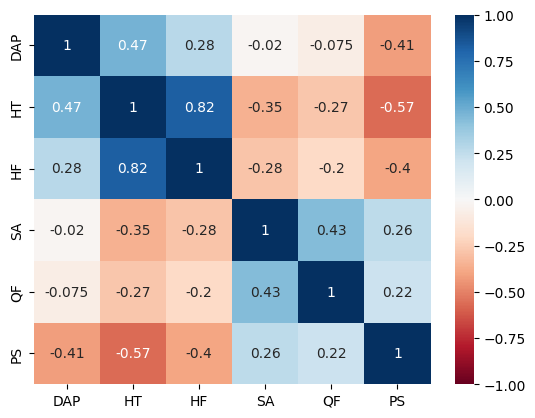

In [ ]:
# Visualização da matriz de correlação para as variáveis de interesse
sns.heatmap(inv_es[["DAP", "HT", "HF", "SA", "QF", "PS"]].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)

Observa-se que três variáveis possuem maior correlação com a altura total, a altura do fuste (positiva), o diâmetro (positiva) e a posição fitossociológica (negativa).

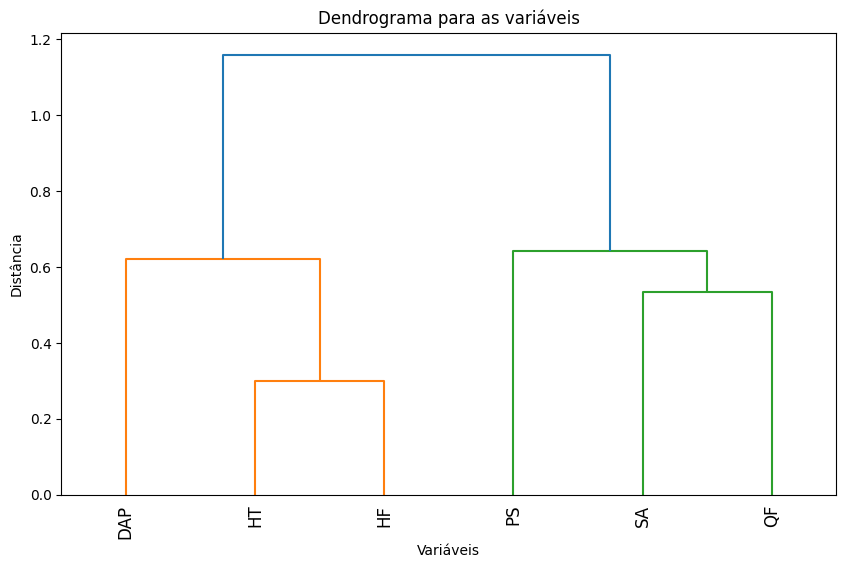

In [ ]:
# Gerando um dendrograma para as variáveis de interesse do conjunto de dados

# Selecionando as colunas relevantes do para a análise
selected_columns = inv_es.iloc[:, 4:10]

# Calculando a matriz de correlação
correlation_matrix = selected_columns.corr().values

# Calculando a matriz de distâncias usando a distância euclidiana
distance_matrix = np.sqrt((1 - correlation_matrix).round(5) / 2)

# Convertendo a matriz de distâncias em uma matriz condensada
condensed_distance_matrix = ssd.squareform(distance_matrix)

# Agrupamento hierárquico com método "ward"
Z = sch.linkage(condensed_distance_matrix, method='ward')

# Plot do dendrograma
plt.figure(figsize=(10, 6))
sch.dendrogram(Z, labels=selected_columns.columns, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrograma para as variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Distância')
plt.show()

Pelo dendrograma observa-se que existem dois grupos de variáveis e que essa divisão faz total sentido. De um lado se agrupam as variáveis mensuradas e do outro as variáveis relacionadas às características das árvores. Observa-se alguma redundância entre qualidade do fuste e sanidade e entre altura total e do fuste.

A conclusão da análise descritiva feita na Sprint 1 previa que a altura do fuste seria a melhor variável para estimar a altura total. No entanto, mesmo sendo mais fácil de medir que a total, ainda assim essa é uma variável complicada.

Sendo assim, optou-se por inicialmente testar modelos sem a altura do fuste. Além dela, também optou-se por retirar do conjunto de dados a variável qualidade do fuste, devido a sua baixa correlação com a altura total e certa redundância com a sanidade.

In [ ]:
# Retirando as colunas com variáveis que não serão utilizadas nas análises
dados = inv_es.drop(['Unnamed: 0',	'UA',	'SU',	'SUBP',	'QF',	'HF'], axis=1)

# Verificando as dez primeiras linhas do dataframe após a operação
dados.head(10)

,DAP,SA,PS,HT
0,11.6,1,2,11.0
1,11.2,1,3,9.0
2,14.3,1,2,12.0
3,14.3,2,2,15.0
4,11.9,1,2,12.0
5,11.9,3,3,3.0
6,10.1,3,3,2.5
7,13.3,1,2,12.0
8,10.5,1,3,7.5
9,15.5,2,3,10.0


# **4 - Divisão do conjunto de dados em treino e teste**

# 4.1 - Sem validação cruzada

In [ ]:
# Dividindo o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    dados[['DAP', 'SA', 'PS']], dados['HT'], test_size=0.20, random_state=0)

Foi realizada a divisão do conjunto de dados em treino e teste. Decidiu-se por dividir o conjunto em 80% dos dados para treino e 20% para teste. Neste primeiro momento, não será utilizada a validação cruzada.

In [ ]:
# Lista das variáveis que se deseja testar
vars_to_test = ['DAP', 'HT', 'SA', 'PS']

# Teste de normalidade para cada variável
for var in vars_to_test:
    stat, p = shapiro(dados[var])
    print(f'{var}: Estatística de teste = {stat:.3f}, p-valor = {p:.3f}')

DAP: Estatística de teste = 0.897, p-valor = 0.000
HT: Estatística de teste = 0.977, p-valor = 0.000
SA: Estatística de teste = 0.689, p-valor = 0.000
PS: Estatística de teste = 0.804, p-valor = 0.000


Observa-se que nenhuma das variáveis apresenta distribuição normal. Portanto, é melhor realizar a normalização dos dados ao invés da padronização.

In [ ]:
# Normalizando os dados de treino
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)

# Normalizando os dados de teste utilizando os valores máximos e mínimos dos dados de treino
X_test_norm = scaler.transform(X_test)

# Convertendo os dados normalizados de array para um dataframe
X_train_df = pd.DataFrame(X_train_norm , columns=['DAP_t', 'SA_t', 'PS_t'])
X_test_df = pd.DataFrame(X_test_norm , columns=['DAP_t', 'SA_t', 'PS_t'])

# Imprimindo as primeiras linhas para conferir
print(X_train_df.head())
print(X_test_df.head())

     DAP_t  SA_t  PS_t
0  0.36875   1.0   1.0
1  0.93125   0.5   0.5
2  0.09375   0.0   1.0
3  0.05000   0.5   1.0
4  0.07500   0.0   0.5
     DAP_t  SA_t  PS_t
0  0.25000   0.0   1.0
1  0.38750   0.5   0.5
2  0.64375   0.0   0.0
3  0.23750   0.0   1.0
4  0.03125   0.0   1.0



Na sequência foi realizada a normalização dos dados de treino e teste das variáveis explicativas. Foi feita cópia dos dados antes da normalização para que na etapa de modelagem possa ser testada a utilização dos dados com e sem transformação.

Os dados foram convertidos em data frame para gerar a visualização abaixo.

In [ ]:
# Modelagem sem valiadação cruzada e com os dados não normalizados

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append(mse)
    names.append(name)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    msg = "%s: MSE %0.2f - RMSE %0.2f - R² %0.2f - MAE %0.2f" % (name, mse, rmse, r2, mae)
    print(msg)

LR: MSE 6.44 - RMSE 2.54 - R² 0.44 - MAE 2.04
Ridge: MSE 6.44 - RMSE 2.54 - R² 0.44 - MAE 2.04
Lasso: MSE 8.84 - RMSE 2.97 - R² 0.23 - MAE 2.43
KNN: MSE 6.82 - RMSE 2.61 - R² 0.41 - MAE 2.01
CART: MSE 9.90 - RMSE 3.15 - R² 0.14 - MAE 2.36
SVM: MSE 6.56 - RMSE 2.56 - R² 0.43 - MAE 2.09


No geral os modelos apresentaram um desempenho ruim com os dados originais, com erro alto e um coeficiente de determinação (R²) baixo, demonstrando que todos os modelos foram capazes de explicar pouco a variação dos dados.

Os modelos linear e Ridge obtiveram o melhor resultado. O resultado praticamente igual desses modelos pode ser explicado pelo fato de eles serem muito parecidos, já que a regressão Ridge consiste na regressão linear com um pequeno viés adicionado para o cálculo dos coeficientes.

In [ ]:
# Modelagem sem valiadação cruzada e com os dados normalizados

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

for name, model in models:
    model.fit(X_train_df, y_train)
    y_pred = model.predict(X_test_df)
    mse = mean_squared_error(y_test, y_pred)
    results.append(mse)
    names.append(name)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    msg = "%s: MSE %0.2f - RMSE %0.2f - R² %0.2f - MAE %0.2f" % (name, mse, rmse, r2, mae)
    print(msg)

LR: MSE 6.44 - RMSE 2.54 - R² 0.44 - MAE 2.04
Ridge: MSE 6.44 - RMSE 2.54 - R² 0.44 - MAE 2.05
Lasso: MSE 11.54 - RMSE 3.40 - R² -0.00 - MAE 2.77
KNN: MSE 6.66 - RMSE 2.58 - R² 0.42 - MAE 1.98
CART: MSE 9.57 - RMSE 3.09 - R² 0.17 - MAE 2.34
SVM: MSE 6.18 - RMSE 2.49 - R² 0.46 - MAE 1.95


Mesmo com os dados normalizados, o desempenho do modelo foi ruim. A principal mudança entre as análises foi que nesta, o melhor modelo foi o SVM, apresentando um erro menor que os modelos linear e Ridge sem normalização.

# 4.2 - Com validação cruzada

In [ ]:
# Preparação dos dados para validação cruzada

# Separação em bases de treino e teste (holdout)
array = dados.values
X = array[:,0:2] # atributos
y = array[:,3] # resposta (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

LR: MSE 7.70 (0.93) - RMSE 2.77
Ridge: MSE 7.70 (0.93) - RMSE 2.77
Lasso: MSE 9.17 (1.16) - RMSE 3.03
KNN: MSE 8.98 (0.97) - RMSE 3.00
CART: MSE 11.51 (0.69) - RMSE 3.39
SVM: MSE 7.91 (1.07) - RMSE 2.81


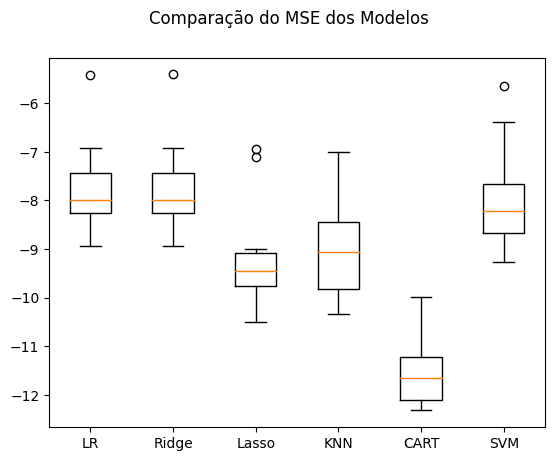

In [ ]:
# Modelagem com validação cruzada e valores não normalizados

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
# Avaliando os modelos pelo R²
for name, model in models:
    # Calculando R²
    r2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2').mean()

    # Imprimindo o valor de R² para cada modelo
    print(f"{name}: R² {r2:.2f}")

LR: R² 0.32
Ridge: R² 0.32
Lasso: R² 0.19
KNN: R² 0.20
CART: R² -0.03
SVM: R² 0.30


Observa-se que os modelos obtiveram resultados consideravelmente piores com a validação cruzada. Esse fato pode ser explicado pela grande variação existente no conjunto de dados e o "baixo" número de observações.

# **5 - Testando os melhores modelos**



In [ ]:
# Criando um modelo com todo o conjunto de treino
model = SVR()
model.fit(X_train_df, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test_df)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 12.62
RMSE 3.55


Observa-se um aumento bastante considerável do erro quando ajustamos o modelo SVM com dados normalizados ao conjunto de teste.

In [ ]:
# Criando um modelo com todo o conjunto de treino
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando o MSE e o RMSE no conjunto de teste
mse = mean_squared_error(y_test, predictions)
print("MSE %0.2f" % mse)
print("RMSE %0.2f" % np.sqrt(abs(mse)))

MSE 7.53
RMSE 2.74


No ajuste do modelo linear ao conjunto de teste dos dados originais também há um aumento no erro, mas em proporções menores.

# **6 - Conclusão**

Os resultados demonstram o grande desafio que é a modelagem em florestas tropicais naturais. Por um lado, é difícil conseguir dados de mensuração, por outro seria necessário utilizar uma grande quantidade de dados para gerar bons modelos.

A estimação da altura a partir do diâmetro foi testada com essa combinação de variáveis apresentada, assim como com outras combinações. Para tornar a apresentação dos resultados mais objetiva, optou-se por apresentar os resultados apenas para a combinação de variáveis que obteve os melhores resultados. Mesmo assim, os resultados podem ser considerados ruins e conclui-se que não foi possível gerar um bom modelo para estimar a altura total a partir de variáveis mais fáceis de se mensurar.